### Windfarm Notebook

***

The weather data that we are analysing was downloaded from the Met Eireann website. We have downloaded data from the four corners of the country to see if there is a variation in wind speed based on location. We will analyse the data and see if the wind speed for Ireland is changing over time. Is Ireland getting windier, less windier?

**With reference to the dataset used in this project**

> •	Copyright Met Éireann

> •	Source www.met.ie

> •	This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/

> •	Met Éireann does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or  damage arising from their use.

>•	This material has been modified from the original 




<div><img src="https://d3hnfqimznafg0.cloudfront.net/image-handler/ts/20180403085507/ri/850/src/images/Article_Images/ImageForArticle_703(1).jpg" alt="Domain Names", width=640, height=360"></div>


 ### Description of Project

***

### **Tasks** 

1.  You may look for your own source of historic weather information, and/or
    use the Met Eireann one (Historical Data - Met Éireann - The Irish
    Meteorological Service). Click on the download button to get a zip file that
    contains a CSV file.
1.  You may need to clean and normalize the data before doing analysis

**Questions you can ask:**

1.  How much wind power is there at a particular location? This is quite open ended, is this just the mean wind speed for
    an hour/day/month/year, or should you take into account that there are wind ranges that the windfarms can operate in. (min
    max speeds)

1.  Some analysis of what power when would be useful (time of day/year)

1.  Are the wind speeds likely to be the same in 10 years in the future? ie is there a trend in recorded wind speeds over the last
    few decades.

1.  Is there any other weather metric worth analyzing (eg rain, temp)

1.  What will the power output of the windfarms in Ireland be like next week, according to the weather forecasts? (ok that is a
    tricky one,because you would need to get, or make up, information about the size and locations of the wind farms in Ireland, 
    or find/makeup the windspeed to power output equation.

1.  Anything else you can think of?


### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other 
features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these 
arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from python.createdb import CreateDB as createdb
from python.createtable import CreateTable as createtable
from python.stations import Stations as stations
from python.import_data import Import_Data as import_data
from python.import_daily import ImportDaily as import_daily
from python.writedb import WriteDB as write
from python.testdb import TestDB as testdb
from python.join import Join as join
from python.clean_dataset import CleanDataset as clean

### Import the weather information for a number of weather stations.
***

Below, we will look at importing the weather data from a number of different locations around the country. We will created python classes to import the datasets into the `data folder` in this repository, and also to import the data to an SQL database called `weather`. We will create tables in the database with the location name of each station that we select for downloading the data from. For example `shannon_airport`, `dublin_airport` etc.

I have downloaded hourly data of each of the stations given in the `weather_stations` list below into the `data\hourly_data` folder of this repository. I had to come back and download daily data of each of the stations also into the `data\daily_data` folder. The reason for this will be explained in the `Load the dataset` section of this notebook, where I ran into some issues with the hourly data files. I have used two different python classes to import the data files. The `python/import_data.py` class has being used to import the hourly data from the Met Eireann website. The `python/import_daily.py` class has being used to import the daily data from the Met Eireann website. 

The `python/writedb.py` class has being instanciated below also, and this class is used to write the hourly data to a `weather` database. This was completed just to look into databases, and learn a little more about `SQL` and databases. The tables contained in the weather database are just stored as tables, and no linking of the tables via `Primary Keys` and `Secondary Keys` has being included.

The images below show the database on the PhpMyAdmin , and the first rows of the 'shannon_airport` table contained in this database.

![PhpMyAdmin](images/mysql_database.png)

![shannon_airport](images/mysql_shannon.png)

In [2]:

# List of weather stations and the number of rows to skip in the data file
weather_stations = [
     [{"athenry" :1875}, 17, 24],
     [{"cork_airport" : 3904}, 23, 25],
     [{"shannon_airport" : 518}, 23, 25],
     [{"dublin_airport" : 532}, 23, 26],
     [{"mullingar": 875}, 17, 24],
     [{"gurteen" : 1475}, 17, 24]
]

# Create the database to store the downloaded data
'''
db = createdb()

#Create an instance of the CreateTable class to create the tables in the database
tables = createtable()

# Create the tables in the database
for i in weather_stations:
    for name, id in i[0].items():
       skiprows = i[1]
       tables.create_table(name, skiprows)

# Create an instatnce of the import data class to import the data into the data folder
# Folder has being created so commenting out to stop it being rerun again and again


data = import_data()

#Import the data from the weather stations
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[1]
        data.import_data(name, id, skiprows)

data2 = import_daily()

#Import the data from the weather stations
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[2]
        data2.import_data(name, id, skiprows)

#Create an instance of the write class to write the data to a database 
#As above database has being created so commenting out to stop it being rerun again and again
#(Takes 4 minutes to load data to sql database)

write = write()

# Write the data to the database using the station name as the table name
for i in weather_stations:
    for name, id in i[0].items():
        skiprows = i[1]
        write.write_db(name, id , skiprows)
'''


'\ndb = createdb()\n\n#Create an instance of the CreateTable class to create the tables in the database\ntables = createtable()\n\n# Create the tables in the database\nfor i in weather_stations:\n    for name, id in i[0].items():\n       skiprows = i[1]\n       tables.create_table(name, skiprows)\n\n# Create an instatnce of the import data class to import the data into the data folder\n# Folder has being created so commenting out to stop it being rerun again and again\n\n\ndata = import_data()\n\n#Import the data from the weather stations\nfor i in weather_stations:\n    for name, id in i[0].items():\n        skiprows = i[1]\n        data.import_data(name, id, skiprows)\n\ndata2 = import_daily()\n\n#Import the data from the weather stations\nfor i in weather_stations:\n    for name, id in i[0].items():\n        skiprows = i[2]\n        data2.import_data(name, id, skiprows)\n\n#Create an instance of the write class to write the data to a database \n#As above database has being created s

In [3]:
#Test the database by querying the data
test = testdb()

#Test the database by querying the data. Print the first 20 rows of the table
test.test_db('cork_airport')

### Load the datasets

***

Since it would be useful to analyse windspeed from the four corners of the country I have downloaded multiple datasets from the Met Eireann website into the `data` folder of this repository above. The datasets were not identical, in so far as they contain a different number of columns depending upon the location they were taken from. For example, in the case of the hourly data, some datasets contained 17 rows metadata, while others contained 23 rows metadata. Some datasets have 15 columns data, while other stations have 21 columns data. Therefore the first 17 rows of some of the datasets, and the first 23 rows of other datasets contained `metadata`, and it was important to skip these rows when importing the dataset from the `Met Eireann` website.  When importing the datasets the `skiprows` argument was passed to the `pd.read_csv()` function to skip the metadata contained in the first number of rows. I have used the metadata in these first rows to rename the columns of the dataset. This makes the datset clearer and easier to read. The `skipinitialspace=True` argument was used while importing the dataset, and the reasoning for this is explained below when we are looking at the missing values in the dataset.

I attempted to create a joined dataset which combined the hourly data for all the stations downloaded. Unfortunately, I ran into a few issues when doing this. There was no issues creating the dataset, but it ended up being approximately 175MB in size, and when I tried to commit this to the my GitHub repository, thats when the fun started. GitHub wont allow files greater than 100MB in size to be uploaded. Indeed, it doesn't like files greater than 50MB being uploaded, but will allow this if `Git Large File Storage (lfs)` is used. With `git lfs`, a reference to the large file is stored in the repository, but the file itself is stored elsewhere. You can set the `.gitattributes` file in your repository to track all the large file contained within it. For simplicity, I decided that all files containing the `.csv` format to be tracked by the `git lfs` system, so these files are not stored in this GitHub repository, but just a pointer to them.

![git lfs](images/github_largefile.png)

As it was not possible to create a joined dataset for the hourly data which was downloaded, and in fairness some of the hourly data files are rather large (shannon_airport_518.csv for example is over 50MB in size), I decided to change track. I am going to keep these files and analyse them indivually, but will also download the daily data for the same stations, and create a joined dataset for these to analyse all the stations in one dataset, side by side. Therefore, in the `data` folder of this repository, you will find an `hourly_data` folder, which contains the datasets to be analysed individually. You will also find a `daily_data` folder which contains daily data of the same weather stations and these are exclusively used to create the `joined_data` dataset, which we will also analyse. 

### Clean the datasets
***

#### Load and clean the daily `joined_data.csv` dataset


First step, we want to the combine all the daily datasets into one, and while we are doing this we will just create a dataset with the columns of interest to us. 

In [4]:
# create a weather data columns list which will be used to create the dataframes
weather_data_columns =[ 'Date/Time (utc)', 
                       'Maximum Air Temperature (C)',  
                       'Minimum  Air Temperature (C)', 
                       'Precipitation Amount (mm)', 
                       'Mean Wind Speed (knot)', 
                       'Highest ten minute mean wind speed (knot)', 
                       'Wind Direction at max 10 min. mean (deg)', 
                       'Highest Gust (knot)'
                       ]


Lets take the weather files contained in the `data/daily_data` folder and combine these into one `joined_data.csv` file which we can then create out pandas dataframe from. The `join` class in the python folder of this repository has being used to join these datasets together, and create a `joined_data.csv` file in the data folder of this repository.

In [5]:
#Lets try joining the dataset together

#Import the class to join our dataset
join = join()

#Join the dataset together
join.join_data(weather_data_columns)

data/daily_data\athenry_1875.csv
athenry
data/daily_data\cork_airport_3904.csv
cork
data/daily_data\dublin_airport_532.csv
dublin
data/daily_data\gurteen_1475.csv
gurteen
data/daily_data\mullingar_875.csv
mullingar
data/daily_data\shannon_airport_518.csv
shannon


Now we can load this joined dataset into a pandas dataframe and clean the dataset. I have demonstrated the steps taken to clean the dataset in the next section of this notebook. We have already completed some cleaning tasks while importing the datasets into our repository. 
For example we have removed all cells that contain whitespace by using the `skipinitialspace` argument in the `read_csv()` function. In some datasets, the cells were found to contain whitespace, and these do not register as NA values. 

![skipspaces](images/skipinitialspace.png)

Therefore, using the `skipinitialspace=True` argument removed the whitespaces that had being masking the hidden values in our dataset. We then got a true picture of the number of missing values in each column of the dataset as shown in the code cell below.

While using the `skipinitialspace=True` argument proved to be simple and effective, its not the only way we could have tackled this problem. We could have went down the route of using python regular expressions in the `df.replace()` function. The regular expression given below would have also converted the whitespace characters in the dataset to NAN values.

```python
df.replace(r",\s", np.nan, regex=True, inplace=True)
```

Another method that could have being used is the find and replace in Visual Studio Code. Again, we would be using a regular expression to achieve this goal. A snapshot of the code we could have used in visual studion code to achieve this is shown below.

![cleaning](images/skipinitialspace.png)

Finally, it should be noted that the `read_csv()` function also contains an argument called `na_values` which allows the user to list strings to be recognised as NAN values. Therefore, for this dataset if we set the `na_values = ' '`, our whitespce characters would be recognised as NAN values when we load in the dataset. More information on this can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

![na_values](images/pandasna_values.png)


In [6]:
#Now lets load the dataset into a pandas dataframe
df = pd.read_csv('data/joined_data.csv')

#View the rows between 10 and 20
df.tail(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112394 entries, 0 to 112393
Data columns (total 9 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date/Time (utc)                            112394 non-null  object 
 1   Maximum Air Temperature (C)                112394 non-null  float64
 2   Minimum  Air Temperature (C)               110815 non-null  float64
 3   Precipitation Amount (mm)                  112298 non-null  float64
 4   Mean Wind Speed (knot)                     112380 non-null  float64
 5   Highest ten minute mean wind speed (knot)  111486 non-null  float64
 6   Wind Direction at max 10 min. mean (deg)   111474 non-null  float64
 7   Highest Gust (knot)                        111488 non-null  float64
 8   station_name                               112394 non-null  object 
dtypes: float64(7), object(2)
memory usage: 7.7+ MB


In [7]:
#Check for missing values

missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                                 0
Maximum Air Temperature (C)                     0
Minimum  Air Temperature (C)                 1579
Precipitation Amount (mm)                      96
Mean Wind Speed (knot)                         14
Highest ten minute mean wind speed (knot)     908
Wind Direction at max 10 min. mean (deg)      920
Highest Gust (knot)                           906
station_name                                    0
dtype: int64


In [8]:
 #Drop the rows with missing values
df.dropna(inplace=True)

#Check for missing values again
missing_values =df.isna().sum()

print(missing_values)


Date/Time (utc)                              0
Maximum Air Temperature (C)                  0
Minimum  Air Temperature (C)                 0
Precipitation Amount (mm)                    0
Mean Wind Speed (knot)                       0
Highest ten minute mean wind speed (knot)    0
Wind Direction at max 10 min. mean (deg)     0
Highest Gust (knot)                          0
station_name                                 0
dtype: int64


In [9]:
#As we will be analysing the data by month, we need to convert the 'Date/Time (utc)' column to a datetime 
df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y')

#Extract the month from the 'Date/Time (utc)' column
df['Month'] = df['Date/Time (utc)'].dt.month

#Extract the year from the 'Date/Time (utc)' column
df['Year'] = df['Date/Time (utc)'].dt.year

#Set the 'Date/Time (utc)' column as the index and get rid of the i
df.set_index('Date/Time (utc)', inplace=True) 


df.head()


,Maximum Air Temperature (C),Minimum Air Temperature (C),Precipitation Amount (mm),Mean Wind Speed (knot),Highest ten minute mean wind speed (knot),Wind Direction at max 10 min. mean (deg),Highest Gust (knot),station_name,Month,Year
Date/Time (utc),,,,,,,,,,
2012-06-28,17.9,13.3,20.0,6.7,13.0,250.0,20.0,athenry,6,2012
2012-06-29,16.1,8.9,2.9,9.9,18.0,220.0,26.0,athenry,6,2012
2012-06-30,14.6,10.2,4.1,8.5,17.0,260.0,26.0,athenry,6,2012
2012-07-01,14.5,7.9,4.8,6.8,10.0,220.0,16.0,athenry,7,2012
2012-07-02,18.3,13.0,4.6,6.0,12.0,230.0,18.0,athenry,7,2012


#### Clean the hourly datasets

***

Okay, so no that we have cleaned the `joined_data.csv` which contains the daily data, lets do the same task for the hourly datasets. We will remove the indicator columns, remove the NA values and set these up as a series of time-series datasets by converting the `Date/Time (utc)` column as a datetime object. We will move through the same process as above very quickly below by implementing our `python/clean_dataset.py` class which will clean each of the individual dataset for us. This has being completed below.


In [ ]:

#Clean the datasets
dublin = clean('dublin_airport', 532, 23)
dublin = dublin.clean_dataset()

shannon = clean('shannon_airport', 518, 23)
shannon = shannon.clean_dataset()

cork = clean('cork_airport', 3904, 23)
cork = cork.clean_dataset()

athenry = clean('athenry', 1875, 17)
athenry = athenry.clean_dataset()

mullingar = clean('mullingar', 875, 17)
mullingar = mullingar.clean_dataset()

gurteen = clean('gurteen', 1475, 17)
gurteen = gurteen.clean_dataset()


dublin.head()

,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Mean Wind Speed (knot)_dublin,Predominant Wind Direction (deg),Month,Year
0,1944-01-01 23:00:00,0.0,8.4,19,260.0,1,1944
1,1944-01-02 00:00:00,0.0,8.3,24,270.0,1,1944
2,1944-01-02 01:00:00,0.0,8.2,24,260.0,1,1944
3,1944-01-02 02:00:00,0.0,8.0,19,270.0,1,1944
4,1944-01-02 03:00:00,0.0,8.2,19,270.0,1,1944


In [11]:
dublin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708952 entries, 0 to 708951
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Date/Time (utc)                   708952 non-null  datetime64[ns]
 1   Precipitation Amount (mm)         708952 non-null  float64       
 2   Temperature (°C)                  708952 non-null  float64       
 3   Mean Wind Speed (knot)_dublin     708952 non-null  int64         
 4   Predominant Wind Direction (deg)  708952 non-null  float64       
 5   Month                             708952 non-null  int32         
 6   Year                              708952 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1)
memory usage: 32.5 MB


Analyse the data

***

So, not that we have cleaned our datasets, we can start to do some analysis on them.  Let us firstly examine what columns we interested in looking at in the datasets. Obviously we need to analyse the wind speed column. Will temperature, wind-direction, precipitaion amount etc have any effect on the windspeed. Lets have a quick loot at the correlation between the variables in the dataset, is any relationship between any of these variables standing out. Lets take the daily `joined_data` dataset first and run a correlation analysis on this.

In [12]:

#Drop columns that are not needed for correlation analysis
correlation_df = df.drop(columns=['station_name', 'Month', 'Year'])

#Correlate the data to see if there are any relationships between the variables
correlation = correlation_df.corr()


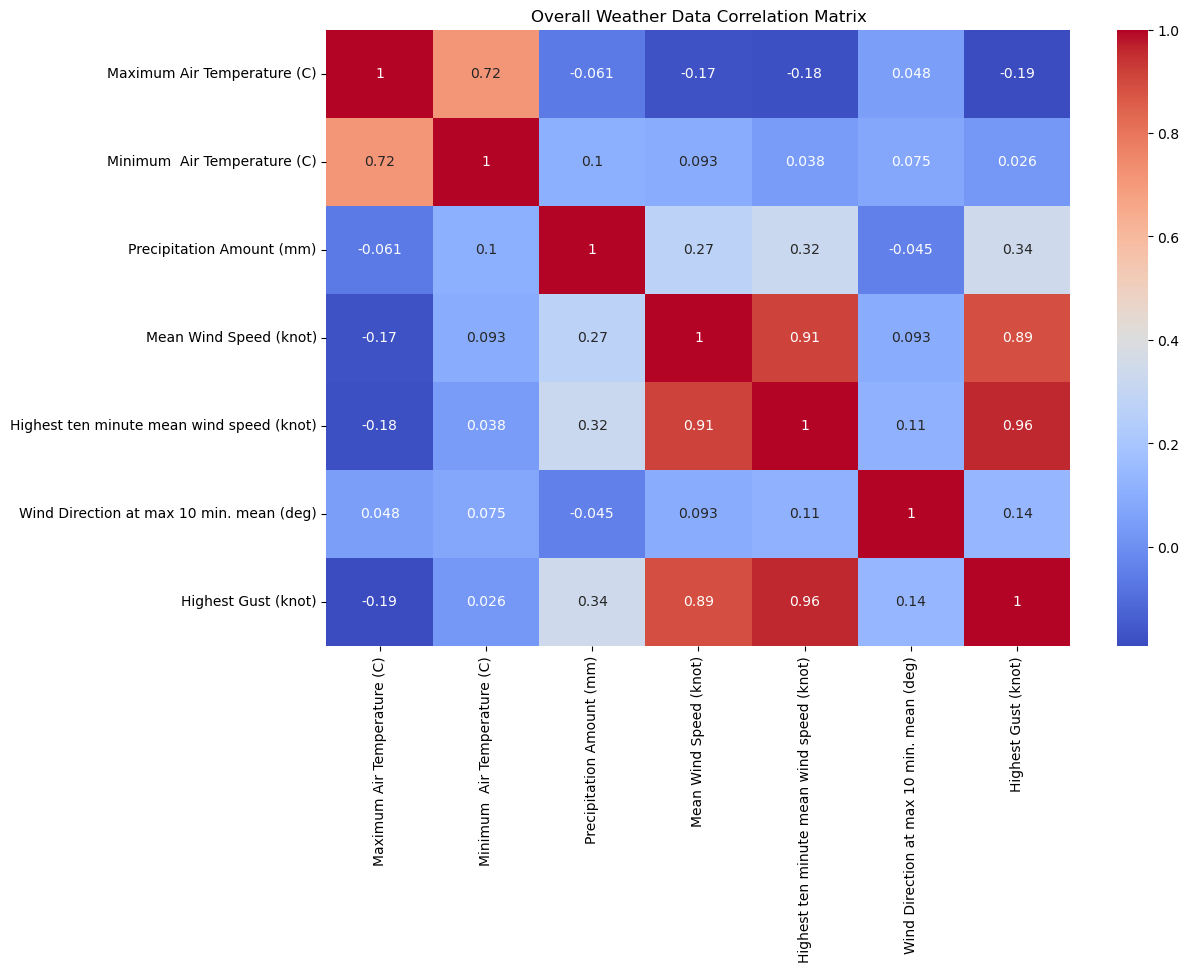

In [13]:
#Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Overall Weather Data Correlation Matrix')
plt.show()



Looking at the above it can be seen that there is very little correlation between temperature, precipitation and wind direction with the wind speed. There is as expected a strong correlation between highest ten minute mean wind speed, and the highest gust columns with the wind speed column. It could be argued that these columns don't really add any futher useful information to our analysis. We are therefore from this point forward only going to deal witht the mean windspeed column when analysing the data to select a suible location for our windfarm.

Obviously, next we need to select a time frame which over which we will analyse our data in the dataset. To do this we should look and see what years the data is being recorded for each station. We can use the `groupby()` function to find the max and min years for each station and this will give us an indication of what timeframe would be best for our analysis. We will do this below.

In [14]:

#Group the stations by year to see the range of years for each station
station_years = df.groupby('station_name')['Year'].agg(['min', 'max'])

#sort by the minimum year
station_years = station_years.sort_values(by='min', ascending=True)

print(station_years)

               min   max
station_name            
dublin        1944  2024
shannon       1945  2024
cork          1962  2024
mullingar     1973  2024
gurteen       2009  2024
athenry       2012  2024


In [15]:
#So athenry has data from 2012 onwards, so lets look at the data from 2012 onwards for all stations

df = df[df['Year'] >= 2012]

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28100 entries, 2012-06-28 to 2024-11-30
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Maximum Air Temperature (C)                28100 non-null  float64
 1   Minimum  Air Temperature (C)               28100 non-null  float64
 2   Precipitation Amount (mm)                  28100 non-null  float64
 3   Mean Wind Speed (knot)                     28100 non-null  float64
 4   Highest ten minute mean wind speed (knot)  28100 non-null  float64
 5   Wind Direction at max 10 min. mean (deg)   28100 non-null  float64
 6   Highest Gust (knot)                        28100 non-null  float64
 7   station_name                               28100 non-null  object 
 8   Month                                      28100 non-null  int32  
 9   Year                                       28100 non-null  int32  
dtypes: fl

# Wind turbine design

Wind turbine design is the process of defining the form and configuration of a wind turbine to extract energy from the wind. An 
installation consists of the systems needed to capture the wind's energy, point the turbine into the wind, convert mechanical 
rotation into electrical power, and other systems to start, stop, and control the turbine.

**Betz Law**
In 1919, German physicist [Albert Betz](https://en.wikipedia.org/wiki/Albert_Betz) showed that for a hypothetical ideal wind-energy 
extraction machine, the fundamental laws of conservation of mass and energy allowed no more than 16/27 (59.3%) of the wind's kinetic 
energy to be captured. This Betz' law limit can be approached by modern turbine designs which reach 70 to 80% of this theoretical 
limit.

The speed at which the turbine first starts to rotate and generate power is called the `cut-in speed` and is typically between `3 and 
4 meters per second`

[cut in speed](https://theroundup.org/wind-turbine-power-curve/)

However, typically somewhere between `12 and 17 meters per second`, the power output reaches the limit that the electrical generator 
is capable of. This limit to the generator output is called the `rated power output` and the wind speed at which it is reached is 
called the `rated output wind speed`.

As the speed increases above the `rated output wind speed`, the forces on the turbine structure continue to rise and, at some point, 
there is a risk of damage to the rotor. As a result, a braking system is employed to bring the rotor to a standstill. This is called 
the `cut-out speed` and is usually around `25 meters per second`.

This is summarised in the table below
  
<center>  

| Wind Speed m/s | Wind Speed mph | What Happens |  
|----------------|-----------------|--------------|  
| ≥ 3-4  | ≥ 7-9  | Cut-in Speed, Wind turbines start operating  |  
| 12–17  | 25-38  | Wind turbines reach rated power output  |   
| ≥ 25   | ≥ 55    | Wind turbines shut down to prevent damage  |

</center>  

**Wind turbine efficiency or power coefficient**

The available power in a stream of wind of the same cross-sectional area as the wind turbine can easily be shown to be:

![Available Power](https://theroundup.org/wp-content/uploads/2022/08/wind-turbine-power-coefficient.png)

Where

U - wind speed is in m/s
p - density in kilograms per cubic meter
d - diameter in meters
and available power is in watts.

The efficiency, μ, or, as it is more commonly called, the power coefficient, cp, of the wind turbine is simply defined as the actual 
power delivered divided by the available power.

![efficiency](https://theroundup.org/wp-content/uploads/2022/08/wind-turbine-power-coefficient-2.png)

Table 1. Speed requirement for some popular wind turbine models. Found at this [source](file:///C:/Users/micha/Downloads/
On_the_need_for_the_development_of_low_wind_speed_.pdf)

| S/N | Turbine Model | Cut-in speed (m/s) | Cut-out speed (m/s) | Rated speed (m/s) | Power Rating (kW) | Hub Height |
|-----|---------------|--------------------|---------------------|-------------------|-------------------|------------|
| 1   | PGE 20/25     | 3.5                | 25                  | 9.0               | 25                | 24/30/36   |
| 2   | Enercon       | 3.0                | 25                  | 12                | 3000              | 120/135    |
| 3   | G.E 1.5 xle   | 3.5                | 20                  | 11.5              | 1500              | 80         |
| 4   | GE 1.5 sle    | 3.5                | 25                  | 14                | 1500              | 65/80      |
| 5   | AV 927        | 3.0                | 25                  | 13.1              | 3300              | 60-80      |
| 6   | AV 928        | 3.0                | 25                  | 11.6              | 2500              | 80         |
| 7   | V 90          | 4.0                | 25                  | 15                | 3000              | 80         |
| 8   | SWT-3.6-107   | 3.0                | 25                  | 13                | 3600              | 80         |



### Wind Quality at our selected locations

Firstly, as we have seen above turbines start operating at windspeeds of approximately 3-4m/s. We also know that they stop operating above speeds of 25m/s. As the wind turbines reach rates output speed between 12-17m/s, we can classify any windspeed above 12m/s as being in the optimal range for wind turbines. Lets now analyse each of our chosen locations and see what percentage of the time the average wind speed is within these operating conditions. This will give us an indication of which location would be more suitable for the location of the wind-farm.



In [16]:
df['Mean Wind Speed (m/s )'] = round(df['Mean Wind Speed (knot)'] * 0.514444, 2)

#Get just the windspeed data for each location and reset the index
windspeed = df[['station_name', 'Mean Wind Speed (m/s )', 'Month', 'Year']].copy().reset_index(drop=True)

#Print the first 5 rows
windspeed.head()


,station_name,Mean Wind Speed (m/s ),Month,Year
0,athenry,3.45,6,2012
1,athenry,5.09,6,2012
2,athenry,4.37,6,2012
3,athenry,3.50,7,2012
4,athenry,3.09,7,2012


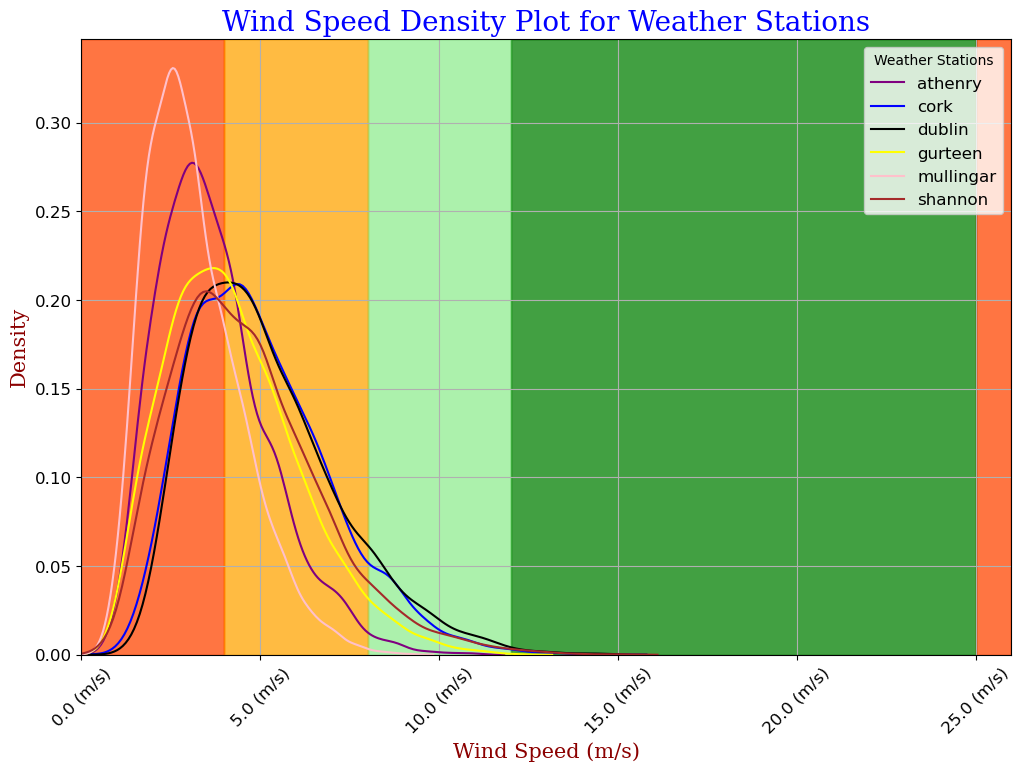

In [17]:

# Create a function to format the windspeed values on the y-axis
def windspeed_formatter(windspeed, pos):
    s = f"{windspeed} (m/s)"
    return s

#Plot the wind speed as a denity plot for each station
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the colours for the density plot
colours = ['orangered', 'orange', 'lightgreen', 'green']
plot_colours = ['purple', 'blue', 'black', 'yellow', 'pink', 'brown']

turbine_rating = ['bad', 'poor', 'good', 'excellent']

i = 0
for station in windspeed['station_name'].unique():
    ax = sns.kdeplot(windspeed[windspeed['station_name'] == station]['Mean Wind Speed (m/s )'], ax=ax, color=plot_colours[i], label=station)
    ax.axvspan(0, 4, alpha=0.2, color=colours[0])
    ax.axvspan(4, 8, alpha=0.2, color=colours[1])
    ax.axvspan(8, 12, alpha=0.2, color=colours[2])
    ax.axvspan(12, 25, alpha=0.2, color=colours[3])
    ax.axvspan(25, 26 , alpha=0.2, color=colours[0])
    
    i += 1
    
#Add a legend
ax.legend(loc='upper right', fontsize=12, title='Weather Stations')

#Set the title and labels for the plot
ax.set_title('Wind Speed Density Plot for Weather Stations', fontdict=font1)
ax.set_xlabel('Wind Speed (m/s)', fontdict=font2)
ax.set_ylabel('Density', fontdict=font2)

#Set the y-axis to display the windspeed in km/h
ax.xaxis.set_major_formatter(windspeed_formatter)

ax.grid(True)
ax.set_xlim(0, 26)

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

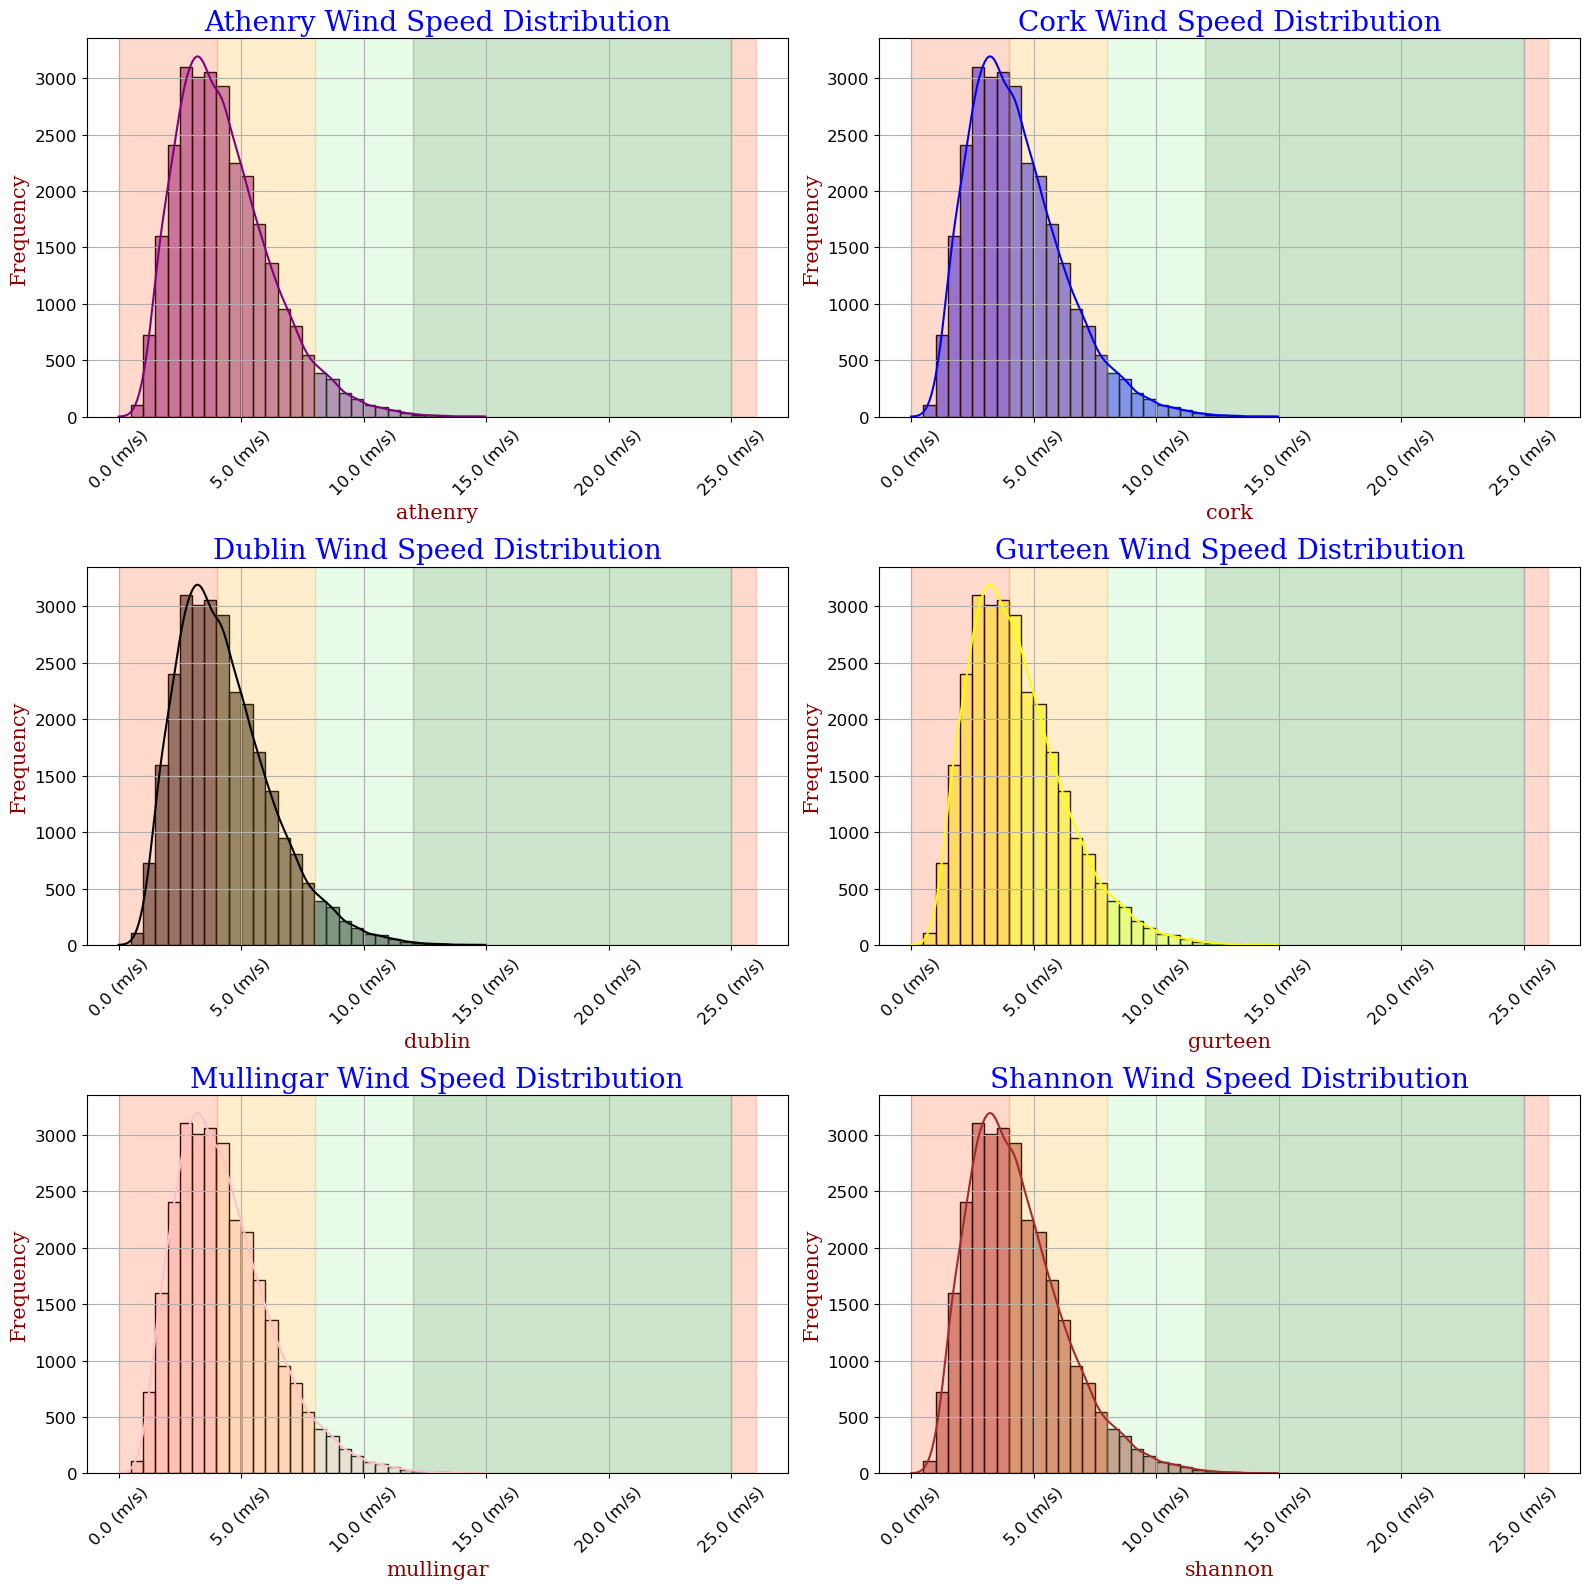

In [18]:
#Plot the wind speed as a denity plot for each station
plt.figure(figsize=(16, 16))

#Set the colours for the density plot
colours = ['orangered', 'orange', 'lightgreen', 'green']
plot_colours = ['purple', 'blue', 'black', 'yellow', 'pink', 'brown']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}


i = 1
for station in windspeed['station_name'].unique():
    plt.subplot(3, 2, i)
    sns.histplot(windspeed['Mean Wind Speed (m/s )'],  bins=30, kde=True, color=plot_colours[i-1])
    plt.axvspan(0, 4, alpha=0.2, color=colours[0])
    plt.axvspan(4, 8, alpha=0.2, color=colours[1])
    plt.axvspan(8, 12, alpha=0.2, color=colours[2])
    plt.axvspan(12, 25, alpha=0.2, color=colours[3])
    plt.axvspan(25, 26 , alpha=0.2, color=colours[0])
    name = station.capitalize()

    #Set the title and labels for the plot
    plt.title(f'{name} Wind Speed Distribution', fontdict=font1)
    plt.xlabel(station, fontdict=font2)
    plt.ylabel('Frequency', fontdict=font2)

    #Set the y-axis to display the windspeed in km/h
    plt.gca().xaxis.set_major_formatter(windspeed_formatter)

    #Add a grid
    plt.grid(True)

    #Add ticks
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    plt.x_lim = (0, 26)

    i += 1

plt.tight_layout()
plt.show()

In [19]:
#Create a new column to store the rating of the wind speed
windspeed['rating'] = ''

count = 0

#Assign a rating to the wind speed in the dataset. The ratings are based on the wind turbine rating system
#We will use the following ratings: bad, poor, good, optimal
#The df.interuples() function is used to iterate over the rows in the dataframe
#We only need to iterate over the wind speed column to assign the rating
#The rating is assigned based on the wind speed value
#The rating is then stored in the 'rating' column in the dataframe
for row in windspeed.itertuples():
    if row[2] < 4:
        windspeed.at[count, 'rating'] = 'low'
    elif row[2] >= 4 and row[2] < 8:
        windspeed.at[count, 'rating'] = 'poor'
    elif row[2] >= 8 and row[2] < 12:
        windspeed.at[count, 'rating'] = 'good'
    elif row[2] >= 12 and row[2] < 25:
        windspeed.at[count, 'rating'] = 'optimal'
    else:
        windspeed.at[count, 'rating'] = 'high'
    count += 1

windspeed.head()

,station_name,Mean Wind Speed (m/s ),Month,Year,rating
0,athenry,3.45,6,2012,low
1,athenry,5.09,6,2012,poor
2,athenry,4.37,6,2012,poor
3,athenry,3.50,7,2012,low
4,athenry,3.09,7,2012,low


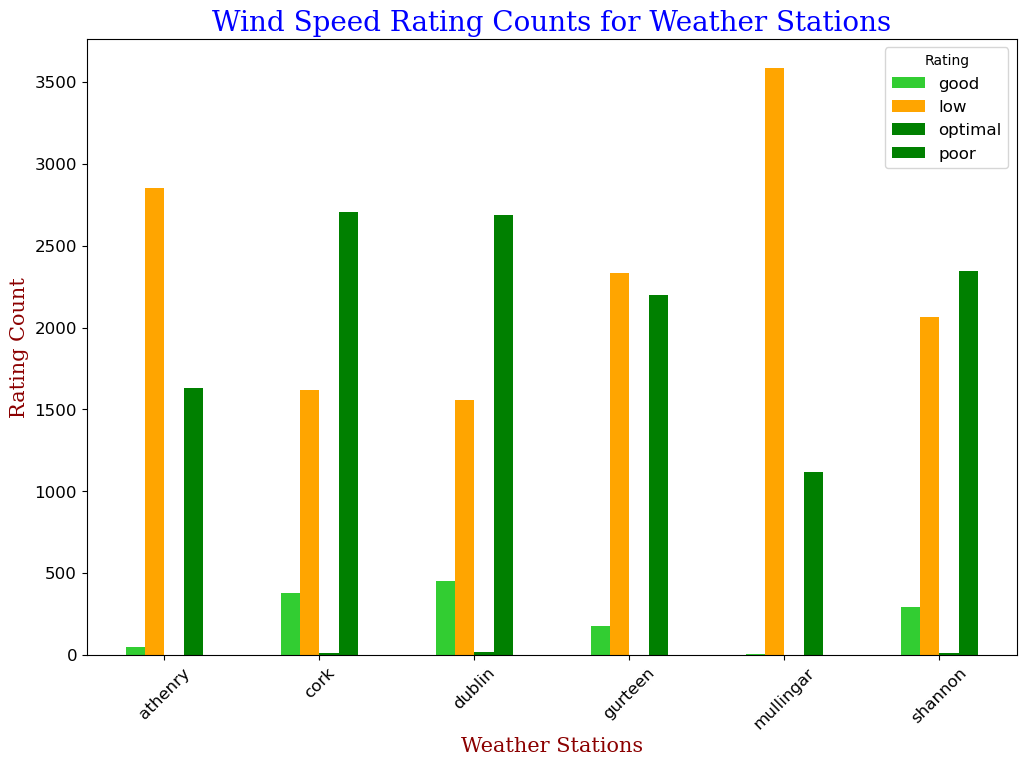

In [20]:
#Sum up each of the ratings for each station
rating_counts = windspeed.groupby(['station_name', 'rating'])['rating'].count()

#Plot the rating counts for each station as a bar chart

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the colours for the bar chart
colours = ['limegreen', 'orange', 'green', 'green', 'red']


rating_counts.unstack().plot(kind='bar', stacked=False, ax=ax, color=colours)

#Set the title and labels for the plot
ax.set_title('Wind Speed Rating Counts for Weather Stations', fontdict=font1)
ax.set_xlabel('Weather Stations', fontdict=font2)
ax.set_ylabel('Rating Count', fontdict=font2)

#Add a legend
ax.legend(title='Rating', fontsize=12)

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()


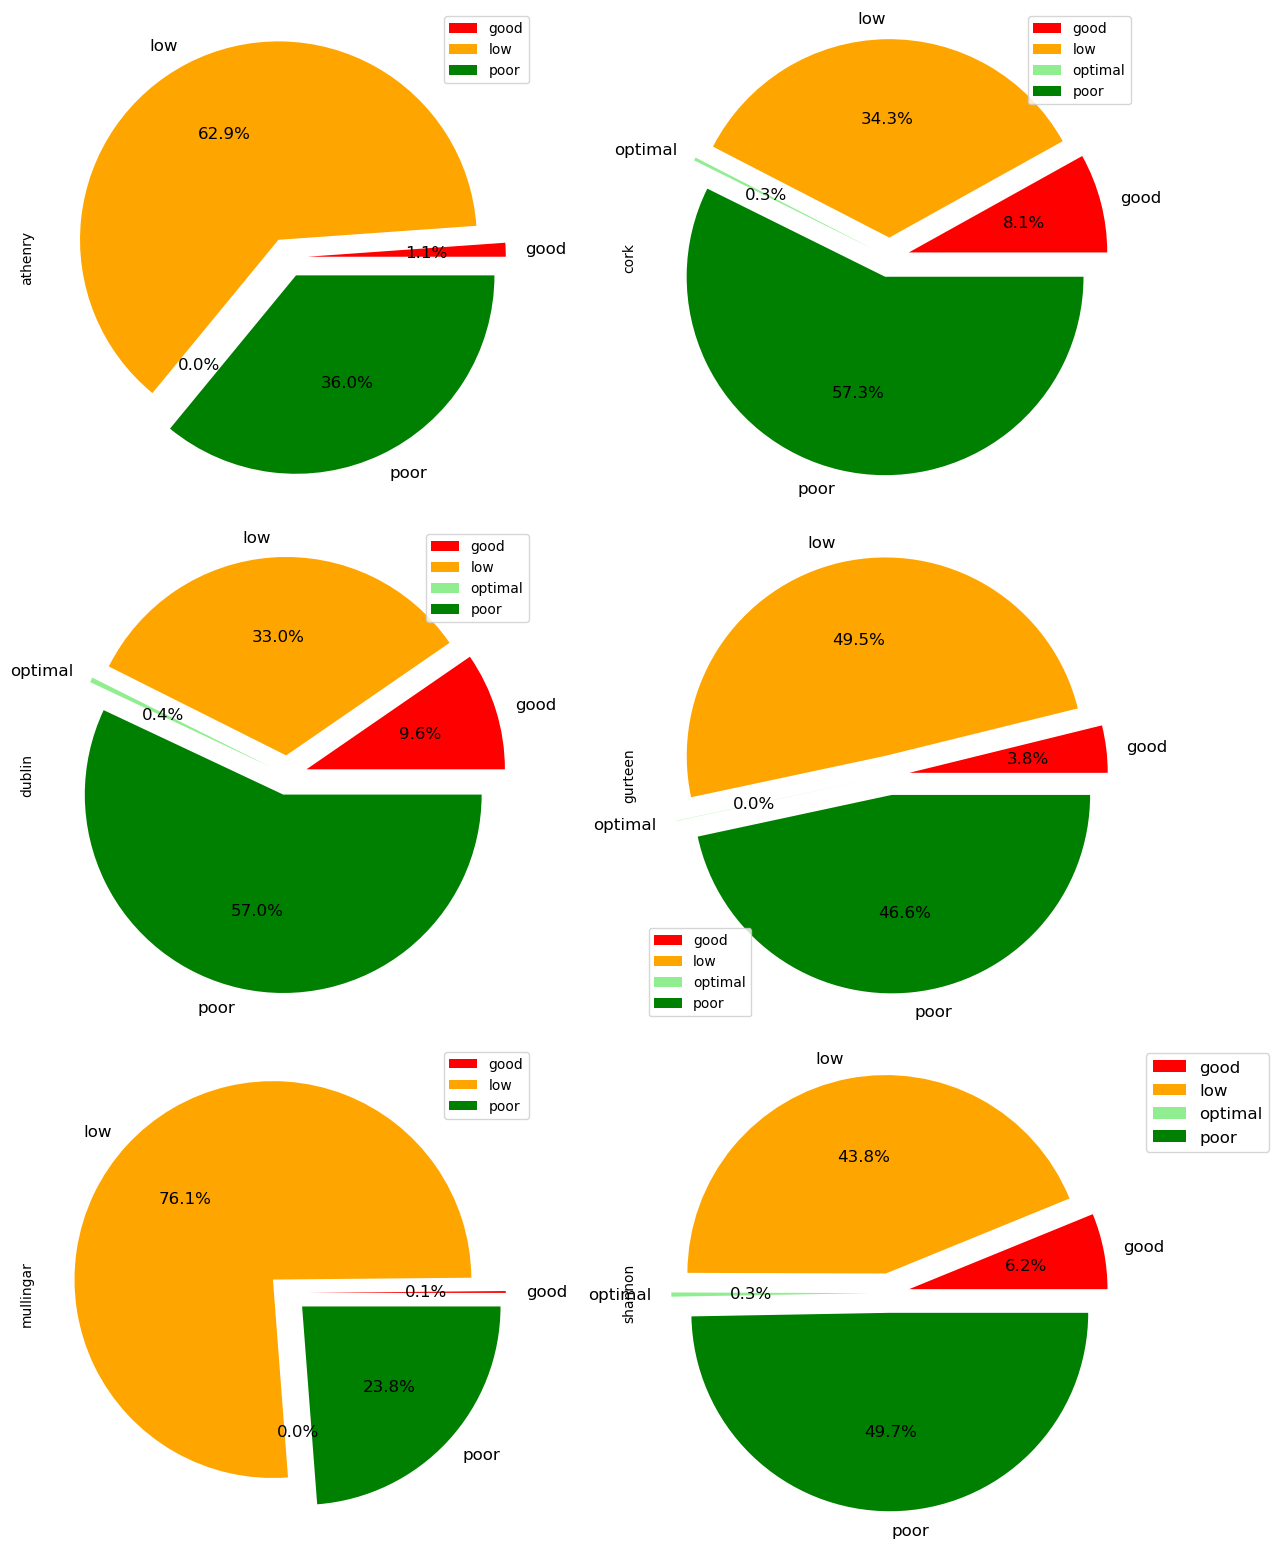

In [21]:
#Plot a pie chart of the rating counts for each station by station
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(13, 16))

#Set the colours for the pie chart
colours = ['red', 'orange', 'lightgreen', 'green', 'red']
rating = ['low','poor','good','optimal', 'high']
colormap = {rating[0]:colours[0], rating[1]:colours[1], rating[2]:colours[2], rating[3]:colours[3], rating[4]:colours[4]}

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

rating_counts = windspeed.groupby(['rating', 'station_name'])['station_name'].count()

exp = (0.1, 0.1, 0.1, 0.1)
rating_counts.unstack().plot(kind='pie', ax=ax, colors=[colormap[key] for key in rating], subplots=True, autopct='%1.1f%%', startangle=0, legend='Distribution of Mean Wind Speed (m/s)', fontsize=12, explode=exp)

# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=rating_counts.index.levels[0], fontsize=12)
plt.subplots_adjust(right=0.7, top=0.9)

plt.tight_layout()


### Are windspeeds likely to be the same in 10 years?

In order to determine whether the windspeeds are likely to change over the next 10years we need to look at the historical trends, lets say a 20 year trend. We will use the hourly datasets to do this rather than the overall

In [22]:
#Review the data for dublin
dublin.head()

,Date/Time (utc),Precipitation Amount (mm),Temperature (°C),Mean Wind Speed (knot)_dublin,Predominant Wind Direction (deg),Month,Year
0,1944-01-01 23:00:00,0.0,8.4,19,260.0,1,1944
1,1944-01-02 00:00:00,0.0,8.3,24,270.0,1,1944
2,1944-01-02 01:00:00,0.0,8.2,24,260.0,1,1944
3,1944-01-02 02:00:00,0.0,8.0,19,270.0,1,1944
4,1944-01-02 03:00:00,0.0,8.2,19,270.0,1,1944


The best fit parameters are m = -0.0002978958834621204 and c = 10.42693344620702


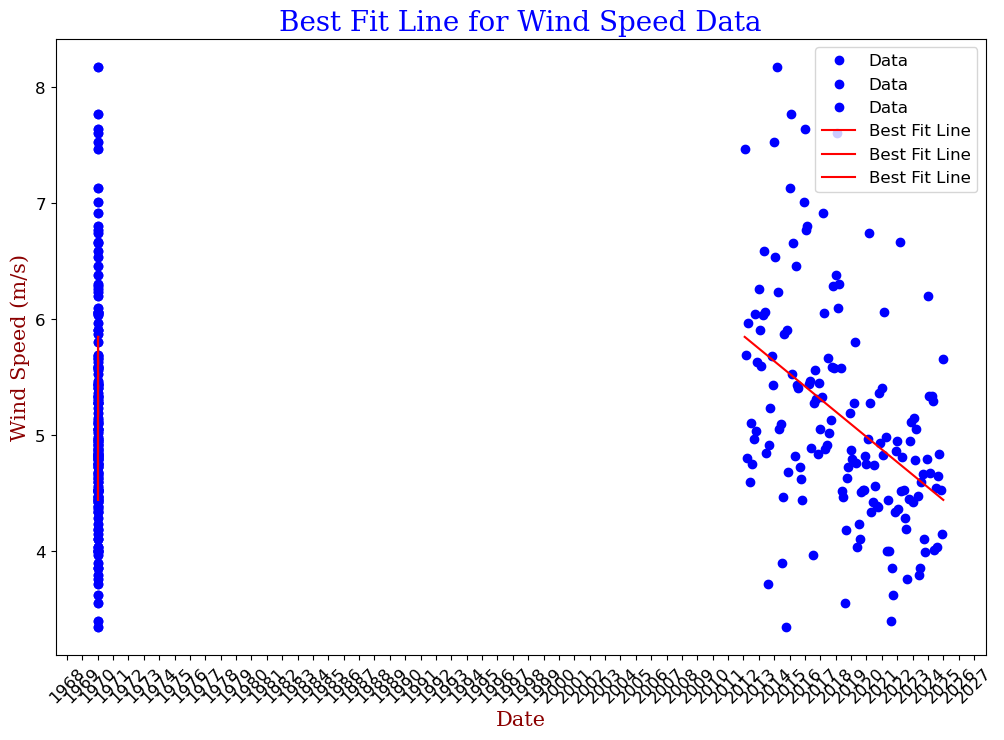

In [32]:
bestfit = clean('dublin_airport', 532, 23)
bestfit = bestfit.clean_dataset()

#Use just the windspeed and Date/Time (utc) columns
bestfit = bestfit[['Date/Time (utc)', 'Mean Wind Speed (knot)_dublin']]

#Convert the Mean Wind Speed (knot) column to m/s
bestfit['Mean Wind Speed (m/s)'] = round(bestfit['Mean Wind Speed (knot)_dublin'] * 0.514444, 2)

#Resample for monthly wind speed data while keeping the mean and the index as the date
bestfit = bestfit.resample('ME', on='Date/Time (utc)').mean()


#Convert the Date/Time (utc) column to a number for analysis
bestfit['DateNumber'] = mdates.date2num(bestfit.index)

#Select the last 12 years of data
bestfit = bestfit[bestfit.index >= '2012-01-31']
bestfit.reset_index(drop=True, inplace=True)

#Calculate the best fit parameters for the wind speed data m,c 
idx = np.isfinite(bestfit['DateNumber']) & np.isfinite(bestfit['Mean Wind Speed (m/s)'])	
 
m, c = np.polyfit(bestfit['DateNumber'][idx], bestfit['Mean Wind Speed (m/s)'][idx], 1)

print(f'The best fit parameters are m = {m} and c = {c}')

#Plot the best fit line
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the data
ax.plot(bestfit, bestfit['Mean Wind Speed (m/s)'], 'o', label='Data', color='blue')

#Plot the best fit line
ax.plot(bestfit, m*bestfit['DateNumber'] + c, 'r-', label='Best Fit Line')

#Set the title and labels for the plot
ax.set_title('Best Fit Line for Wind Speed Data', fontdict=font1)

ax.set_xlabel('Date', fontdict=font2)
ax.set_ylabel('Wind Speed (m/s)', fontdict=font2)

#Add a legend
ax.legend(loc='upper right', fontsize=12)

ax.xaxis.set_major_locator(mdates.YearLocator())  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  


#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()